# Notebook activity 4.12 Choosing a model for the OU students dataset

In Activity 36 (Subection 6.2, Unit 4), we fitted a regression model for the response `examScore` (the final exam score, taking values from 0 to 100, rounded to the nearest integer) from the OU students dataset (Subsection 5.3, Unit 4) using two covariates (`bestPrevModScore` and `age`) and two factors (`gender` and `qualLink`) as the explanatory variables. In that activity, we assumed that there weren't any interactions between the explanatory variables. 

In this notebook activity, we will use the same response and explanatory variables, but this time we will also include interactions. Stepwise regression will be used to choose a model for `examScore`. 

As a reminder, the explanatory variables are defined as follows.

* `bestPrevModScore`:  the best previous overall final module score, taking values from 0 to 100 (rounded to one decimal place)
* `age`: the age of the student (in years), with one of the values $-2$, $-1$, $0$, $1$ or $2$ randomly added
* `gender`: the gender the individual identifies with, taking the two possible values f (for female) and m (for male)
* `qualLink`: the OU qualification the student is linked to, taking possible values maths (for qualifications containing substantial mathematical content) and not (for all other qualifications or no qualification link)

The data are stored in the `ouStudents` data frame.

## (a) Getting started

### (i)

Start by loading the `M348` package, loading the `ouStudents` data frame and checking that `ouStudents` has loaded correctly, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the ouStudents data frame
data(ouStudents)
# Check the data frame has loaded OK
head(ouStudents)

## (b) Fitting the full and null models

### (i)

In the empty code cell below, fit a model for the response `examScore` with the four explanatory variables `bestPrevModScore`, `age`, `gender` and `qualLink`, together with *all* of the associated interactions between them.

Save the output from the model in an object called `examScoreFullModel`. (You don't, however, need to obtain a summary of the results.)

#### Solution <a class="tocSkip">

The required code is given below.

Note that running the code will save the output from fitting the model to the object `examScoreFullModel`, but won't produce any output on screen.

In [2]:
# Fit the full model
examScoreFullModel <- lm(examScore ~ bestPrevModScore * age * gender * qualLink,
                        data = ouStudents)

### (ii)

In the empty code cell below, fit the null model for `examScore`.

Save the output from the model in an object called `examScoreNullModel`.  (Again, you don't need to obtain a summary of the results.)

#### Solution <a class="tocSkip">

The null model is the model with *no* explanatory variables. The required code to fit the null model is given in the code cell below.

Running the code will save the output from fitting the model to the object `examScoreNullModel`, but won't produce any output on screen.

In [3]:
# Fit the null model
examScoreNullModel <- lm(examScore ~ 1, data = ouStudents)

## (c) Searching for a parsimonous model

### (i)

Run the code cell below to carry out a stepwise regression procedure in both directions, saving the result in an object called `examScoreChosenModel`. Which model does the procedure choose?

In [ ]:
# Carry out a stepwise regression procedure between the null and full models
#   in both directions 
examScoreChosenModel <- step(examScoreFullModel, direction = "both", 
     scope = list(lower = examScoreNullModel, upper = examScoreFullModel))

#### Solution <a class="tocSkip">

The final model chosen by the stepwise regression procedure (given at the end of the output) is

`examScore ~ bestPrevModScore + age + gender + qualLink + 
    bestPrevModScore:age + bestPrevModScore:qualLink + gender:qualLink`.
    
So, the chosen model has all four explanatory variables, together with three of the two-way interactions.

## (d) Checking the parsimonious model

### (i)

Use the empty code cell below to produce the residual plot and the normal probability plot for the model chosen in part (c)(i) by stepwise regression. 

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

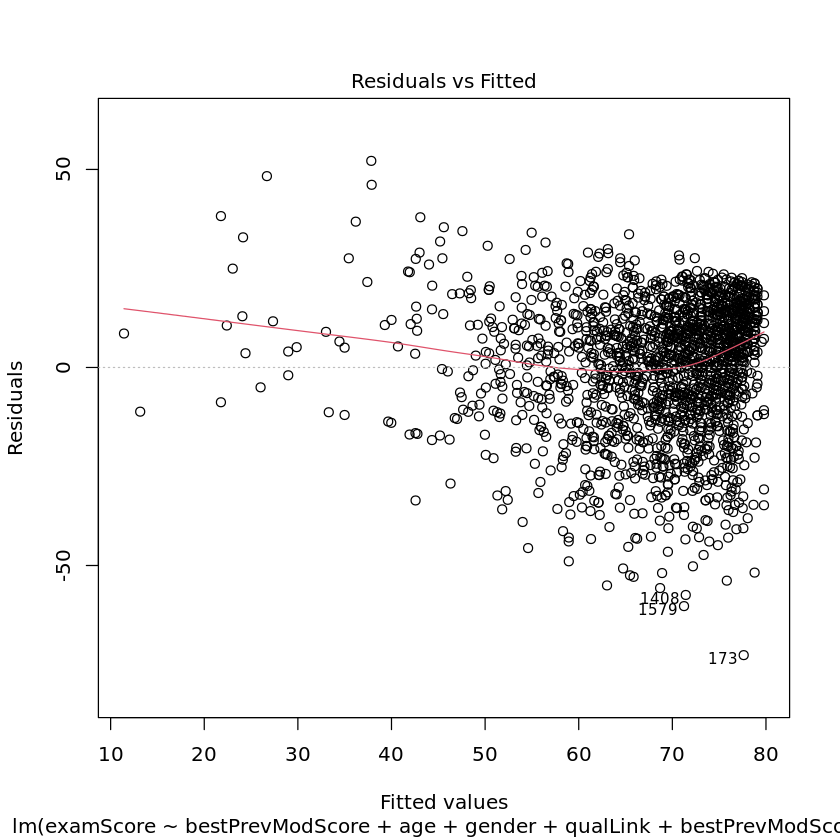

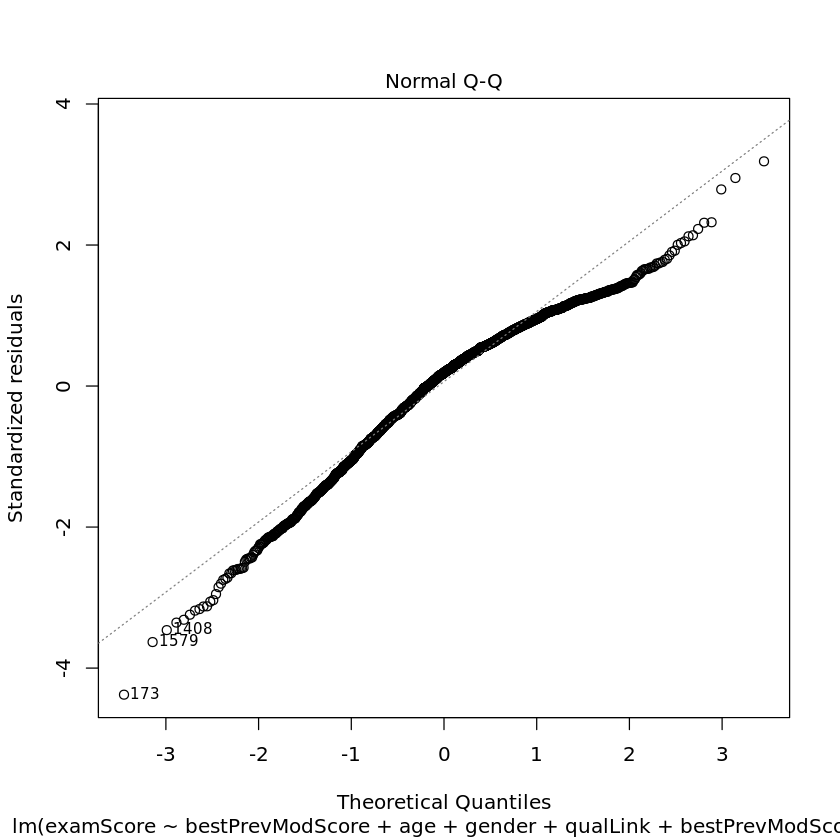

In [5]:
plot(examScoreChosenModel, 1)
plot(examScoreChosenModel, 2)

### (ii)

Do either of the plots you produced in part (i) suggest any problems with the assumptions of the parallel slopes model for these data? Why or why not?

#### Solution <a class="tocSkip">

Although the assumption of constant variance seems reasonable, there seems to be a downward trend in the residual values in the residual plot which casts doubt on the assumption of zero mean.

The assumption of normality also seems in doubt, since the points in the normal probability plot seem to deviate systematically from the line.